In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl

# import seaborn as sns
# plt.style.use('seaborn-darkgrid')

import glob
from matplotlib import rcParams, rc

# rcParams['font.family'] = 'sans-serif'
# rc('font',**{'family':'serif','serif':['Times']})


In [6]:
data = {
    'actively_learned_koopman' : {20 : [], 30 : [], 40 : []},
    'stable_koopman' : {20 : [], 30 : [], 40 : []}
}

stable_koopman = []
unstable_koopman = []

for fpath in glob.glob('data/*.pkl'):
    _data = pkl.load(open(fpath, 'rb'))
    data[_data['kind']][_data['T']].append(_data['err'])
#     stable_koopman.append()

regular 0.9283337313903817 1.1354480974843073
stable 1.0144525656819334 1.2309817544214148
regular 0.9939004266611171 1.7948400187041864
stable 0.9669984546634929 1.868624627192713
regular 13.451677906780198 7.274856598262293
stable 1.875498841149362 3.7329159135372767


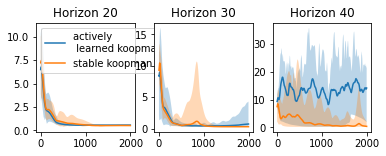

In [14]:
fig, ax = plt.subplots(1, 3, figsize=(6,2))

x = [i for i in range(2000)]

for i, T in enumerate([20, 30,40]):
    mean = np.mean(data['actively_learned_koopman'][T], axis=0)
    ax[i].plot(mean, label='actively \n learned koopman')
    ax[i].fill_between(
        x, 
        np.min(data['actively_learned_koopman'][T], axis=0),
        np.max(data['actively_learned_koopman'][T], axis=0), alpha=0.3
    )
    ax[i].grid(False)
    print('regular',np.mean(mean), np.std(data['actively_learned_koopman'][T]))

    
    mean = np.mean(data['stable_koopman'][T], axis=0)
    ax[i].plot(mean, label='stable koopman')
    ax[i].fill_between(
        x, 
        np.min(data['stable_koopman'][T], axis=0),
        np.max(data['stable_koopman'][T], axis=0), alpha=0.3
    )
    print('stable',np.mean(mean), np.std(data['stable_koopman'][T]))

#     ax[i].set_ylim(0.2, 20)
    ax[i].set_title('Horizon ' + str(T))
ax[0].legend()

plt.savefig('updated_fig.pdf')
plt.show()